<a href="https://colab.research.google.com/github/keithvtls/Numerical-Method-Activities/blob/main/Finals/58015_Numerical_Differentiation_Yon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Members:

D.M. Fajardo © 2021

I.J. Timbungco © 2021

M.A. Rodriguez © 2021

N.K. Vitales © 2021

In [ ]:
import numpy as np
from scipy.special import binom
import sympy as sp
from scipy.misc import derivative
import matplotlib.pyplot as plt 
import math
from pandas import DataFrame
from sympy import series, Symbol
from sympy.plotting import plot
%matplotlib inline

# Part 1

$$y_1 = \left(\frac{4x^2+2x+1}{x+2e^x}\right)^x$$

In [ ]:
y1 = lambda x : ((4*x**2 + 2*x + 1)/(x+2*np.exp(x)))**x
x = 0.1
dx = 0.05

In [ ]:
binom_coeffs = lambda n : np.asarray([binom(n,k) for k in range(n+1)])

In [ ]:
# Forward Finite Differentation
def diff_fwd(f,x,dx,degree=1):
  f_ans = f(x+((np.arange(degree,-1,-1))*dx)) #get the increments of f(x)
  binom_coeffs = lambda n : np.asarray([binom(degree,k) for k in range(degree+1)])
  bin = binom_coeffs(degree)
  bin[1::2] *= -1 ## Changing the signs of the binomial coeffs following Eq.5.2
  diff = (bin @ f_ans) / dx**degree #vecotrized form, since Eq.5.2 follows the linear combination form
  return diff

In [ ]:
# Backward Finite Differentiation (General Function)
def diff_bwd(f,x,dx,degree=1):
  f_ans = f(x+(np.arange(0,-(degree+1),-1))*dx)
  binom_coeffs = lambda n : np.asarray([binom(degree,k) for k in range(degree+1)])
  bin = binom_coeffs(degree)
  bin[1::2] *= -1
  diff =  (bin @ f_ans) / dx**degree
  return diff

In [ ]:
# Central Finite Differentiation (General Function)
def diff_cen(f,x,dx,degree=1):
  while degree >= 0:
    incre = (np.arange((degree/2),-(np.ceil(degree/2)+1),-1))
    if np.mod(degree, 2) == 1:
      f_ans =f(x+((np.delete(incre,len(incre)//2))*dx))
      bin = binom_coeffs(degree)
      bin[1::2] *= -1
      diff = (bin @ f_ans) / (2*dx**degree)
    else :
      f_ans = f(x+(incre)*dx)
      bin = binom_coeffs(degree)
      bin[1::2] *= -1
      diff = (bin @ f_ans) / (dx**degree)
    return diff

In [ ]:
print('Forward Finite')

degree = 3
for n in range(0,degree+1):
  print(diff_fwd(y1,x,dx,n))

print('\nBackward Finite')

for n in range(0,degree+1):
  print(diff_bwd(y1,x,dx,n))

print('\nCentral Finite')

for n in range(0,degree+1):
    print(diff_cen(y1,x,dx,n))

Forward Finite
0.9396682312481898
-0.4499158496124789
2.1039516581967006
-1.9844013152638946

Backward Finite
0.9396682312481898
-0.5551914719430662
1.9250486230014459
9.635605341683727

Central Finite
0.9396682312481898
-0.5541105556754333
2.1055124466117454
225.55304130975966


$$y_2 = \cos(2x)+\frac{x^2}{20}+e^{-2x}$$

In [ ]:
y2 = lambda x : np.cos(2*x) + (x**2)/(20) + np.exp(-2*x)
x = 0.1
dx = 0.05

In [ ]:
# Forward Finite Differentation
def diff_fwd(f,x,dx,degree=1):
  f_ans = f(x+((np.arange(degree,-1,-1))*dx)) #get the increments of f(x)
  binom_coeffs = lambda n : np.asarray([binom(degree,k) for k in range(degree+1)])
  bin = binom_coeffs(degree)
  bin[1::2] *= -1 ## Changing the signs of the binomial coeffs following Eq.5.2
  diff = (bin @ f_ans) / dx**degree #vecotrized form, since Eq.5.2 follows the linear combination form
  return diff

In [ ]:
# Backward Finite Differentiation (General Function)
def diff_bwd(f,x,dx,degree=1):
  f_ans = f(x+(np.arange(0,-(degree+1),-1))*dx)
  binom_coeffs = lambda n : np.asarray([binom(degree,k) for k in range(degree+1)])
  bin = binom_coeffs(degree)
  bin[1::2] *= -1
  diff =  (bin @ f_ans) / dx**degree
  return diff

In [ ]:
# Center Finite Differentiation (General Function)
def diff_cen(f,x,dx,degree=1):
  while degree >= 0:
    incre = (np.arange((degree/2),-(np.ceil(degree/2)+1),-1))
    if np.mod(degree, 2) == 1:
      f_ans =f(x+((np.delete(incre,len(incre)//2))*dx))
      bin = binom_coeffs(degree)
      bin[1::2] *= -1
      diff = (bin @ f_ans) / (2*dx**degree)
    else :
      f_ans = f(x+(incre)*dx)
      bin = binom_coeffs(degree)
      bin[1::2] *= -1
      diff = (bin @ f_ans) / (dx**degree)
    return diff

In [ ]:
print('Forward Finite')

degree = 3
for n in range(0,degree+1):
  print(diff_fwd(y2,x,dx,n))

print('\nBackward Finite')

for n in range(0,degree+1):
  print(diff_bwd(y2,x,dx,n))

print('\nCentral Finite')

for n in range(0,degree+1):
    print(diff_cen(y2,x,dx,n))

Forward Finite
1.7992973309192233
-2.0403524222379854
-0.7524194627601232
-2.9048000785465424

Backward Finite
1.7992973309192233
-2.013385047895242
-0.2543342834989914
-7.220019011253241

Central Finite
1.7992973309192233
-2.0151648011363066
-0.5393474868548686
800.3555445439756


## Approximation Error:

$$y_1 = \left(\frac{4x^2+2x+1}{x+2e^x}\right)^x$$

In [ ]:
y1_fwd_err, y1_bwd_err, y1_cen_err = [], [], []

print('Forward Finite Approximation Error')
for n in range(0,degree+1):
  y1_diff_fwd_err = np.append(abs(derivative(y1,x,dx,n=n,order=5)-diff_fwd(y1,x,dx,n)),y1_fwd_err)
  print(y1_diff_fwd_err)

print('\nBackward Finite Approximation Error')
for n in range(0,degree+1):
  y1_diff_bwd_err = np.append(abs(derivative(y1,x,dx,n=n,order=5)-diff_bwd(y1,x,dx,n)),y1_bwd_err)
  print(y1_diff_bwd_err)

print('\nCentral Finite Approximation Error')
for n in range(0,degree+1):
  y1_diff_cen_err = np.append(abs(derivative(y1,x,dx,n=n,order=5)-diff_cen(y1,x,dx,n)),y1_cen_err)
  print(y1_diff_cen_err)

Forward Finite Approximation Error
[0.]
[0.05338324]
[0.01672951]
[3.77343167]

Backward Finite Approximation Error
[0.]
[0.05189238]
[0.19563254]
[7.84657499]

Central Finite Approximation Error
[0.]
[0.05081147]
[0.01516872]
[223.76401096]


$$y_2 = \cos(2x)+\frac{x^2}{20}+e^{-2x}$$

In [ ]:
y2_fwd_err, y2_bwd_err, y2_cen_err = [], [], []
print('Forward Finite Approximation Error')
for n in range(0,degree+1):
  y2_diff_fwd_err = np.append(abs(derivative(y2,x,dx,n=n,order=5)-diff_fwd(y2,x,dx,n)),y2_fwd_err)
  print(y2_diff_fwd_err)

print('\nBackward Finite Approximation Error')
for n in range(0,degree+1):
  y2_diff_bwd_err = np.append(abs(derivative(y2,x,dx,n=n,order=5)-diff_bwd(y2,x,dx,n)),y2_bwd_err)
  print(y2_diff_bwd_err)

print('\nCentral Finite Approximation Error')
for n in range(0,degree+1):
  y2_diff_cen_err = np.append(abs(derivative(y2,x,dx,n=n,order=5)-diff_cen(y2,x,dx,n)),y2_cen_err)
  print(y2_diff_cen_err)

Forward Finite Approximation Error
[0.]
[0.01555904]
[0.20707687]
[2.07605171]

Backward Finite Approximation Error
[0.]
[0.01140833]
[0.29100831]
[2.23916722]

Central Finite Approximation Error
[0.]
[0.00962858]
[0.0059951]
[805.33639634]


# Part 2

$$y_1 = \left(\frac{4x^2+2x+1}{x+2e^x}\right)^x$$



In [ ]:
x = Symbol('x')

In [ ]:
def taylor(function, x0, n): 
    return function.series(x,x0,n).removeO()
taylor(((4*x**2+2*x+1)/(x+2*sp.exp(x)))**x,2*np.pi,7)

-5.96992401727825e-5*x + 19.4181331643363*(0.159154943091895*x - 1)**6 - 4.15608064726146*(0.159154943091895*x - 1)**5 + 0.675340254143445*(0.159154943091895*x - 1)**4 - 0.0815699670902433*(0.159154943091895*x - 1)**3 + 0.00695309609550114*(0.159154943091895*x - 1)**2 + 0.000384769233017261

/usr/local/lib/python3.7/dist-packages/sympy/plotting/plot.py:1406: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


<Figure size 2160x1296 with 0 Axes>

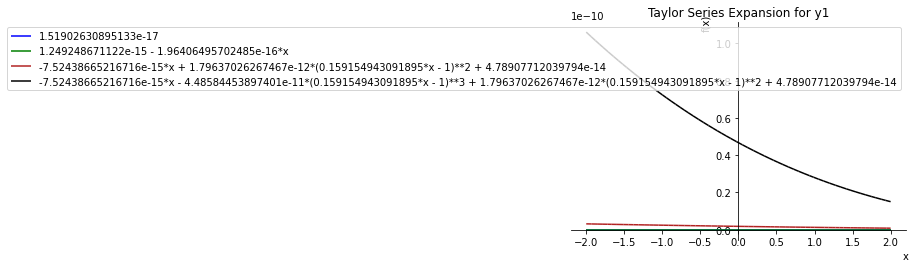

In [ ]:
p = plot(taylor((4*x**2+2*x+1)/(x+2*sp.exp(x))**x,2*np.pi,1),
         taylor((4*x**2+2*x+1)/(x+2*sp.exp(x))**x,2*np.pi,2),
         taylor((4*x**2+2*x+1)/(x+2*sp.exp(x)**x),2*np.pi,3),
         taylor((4*x**2+2*x+1)/(x+2*sp.exp(x)**x),2*np.pi,4),
                (x,-2,2),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for y1'
plt.figure(figsize=(10*3,6*3))
p.show()

$$y_2 = \cos(2x)+\frac{x^2}{20}+e^{-2x}$$

In [ ]:
def taylor(function, x0, n):
    return function.series(x,x0,n).removeO()
taylor(sp.cos(2*x) + x**2/20 + sp.exp(-2*x),2*np.pi,7)  

0.628311556033247*x - 5469.21722812899*(0.159154943091895*x - 1)**6 - 0.0091067341519832*(0.159154943091895*x - 1)**5 + 1039.03392781708*(0.159154943091895*x - 1)**4 - 0.00115338135456782*(0.159154943091895*x - 1)**3 - 76.9826389789813*(0.159154943091895*x - 1)**2 - 0.973873569639014

/usr/local/lib/python3.7/dist-packages/sympy/plotting/plot.py:1406: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


<Figure size 2160x1296 with 0 Axes>

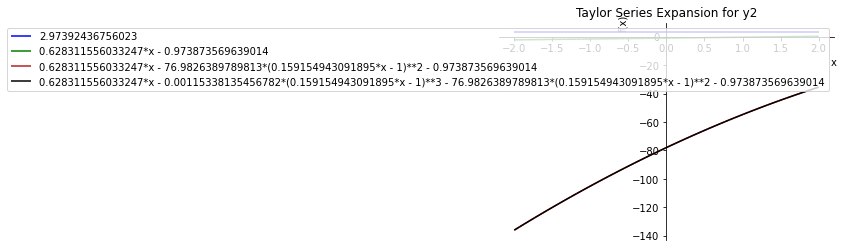

In [ ]:
p = plot(taylor(sp.cos(2*x) + x**2/20 + sp.exp(-2*x),2*np.pi,1),taylor(sp.cos(2*x) + x**2/20 + sp.exp(-2*x),2*np.pi,2),taylor(sp.cos(2*x) + x**2/20 + sp.exp(-2*x),2*np.pi,3),taylor(sp.cos(2*x) + x**2/20 + sp.exp(-2*x),2*np.pi,4),
                (x,-2,2),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for y2' 
plt.figure(figsize=(10*3,6*3))
p.show()